In [6]:
!pip install matplotlib


  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.6 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 10.8 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 13.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 12.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
image = cv2.imread('sar_2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

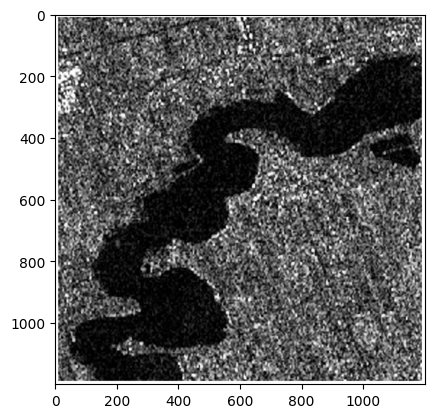

In [9]:
plt.imshow(image_gray, cmap="gray")

# Точечная бинаризация

In [10]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

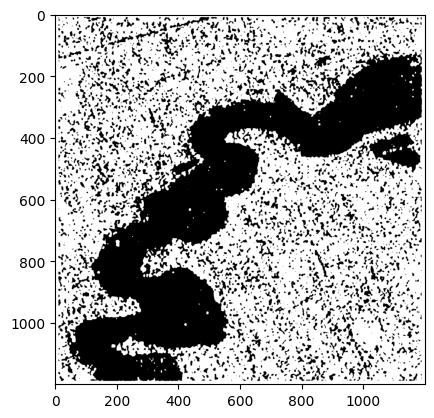

In [11]:
plt.imshow(bin_img, cmap="gray")

# Бинаризация Отсу

In [12]:
# otsu binarization
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

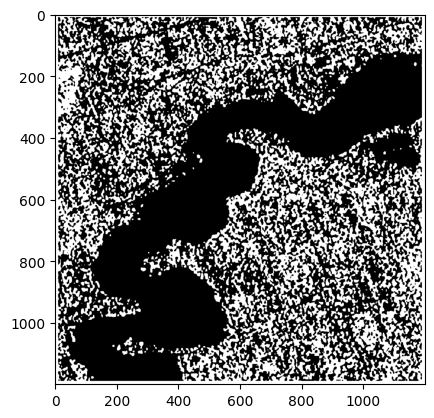

In [13]:
plt.imshow(th2, cmap="gray")

# Адаптивная бинаризация

In [14]:
# 
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)


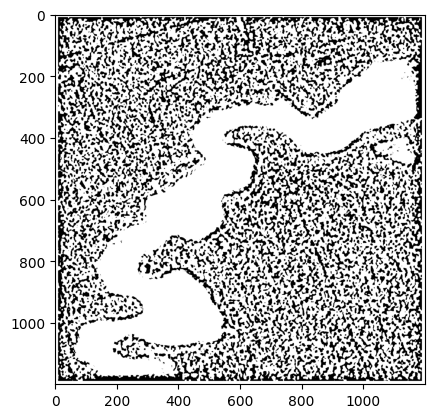

In [15]:
plt.imshow(th3, cmap="gray")

# Оператор Собеля

In [16]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

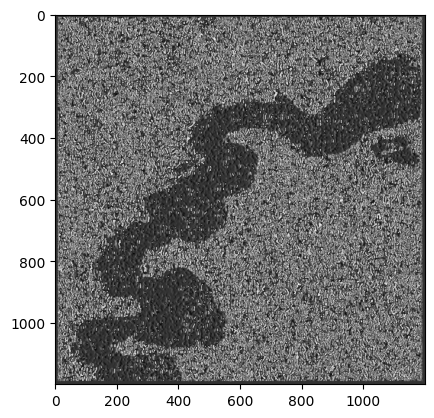

In [17]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

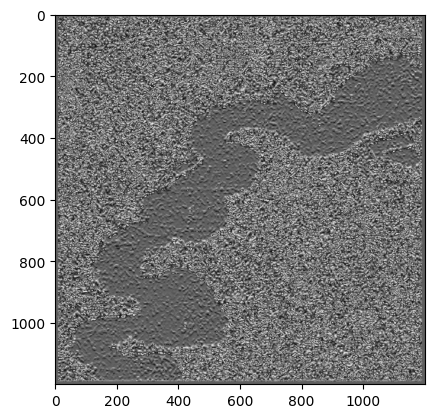

In [18]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [19]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0) # mean value between

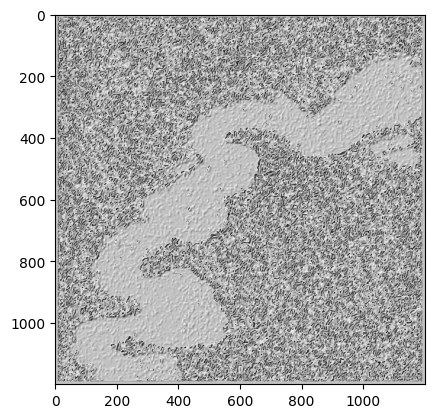

In [20]:
plt.imshow((grad - grad.min())*255, cmap="gray")

# Canny

In [21]:
edges = cv2.Canny(image_gray,100,200)

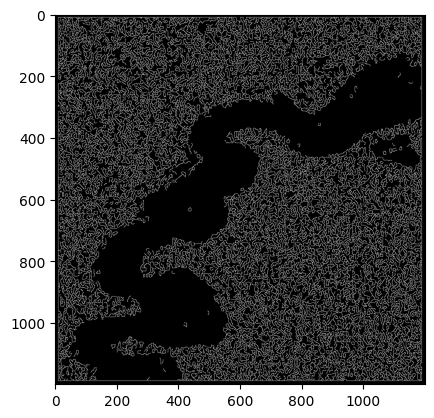

In [22]:
plt.imshow(edges, cmap="gray")

# Преобразование Хафа

In [23]:
image = cv2.imread('img_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

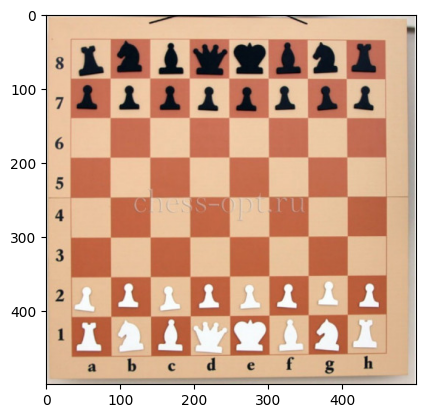

In [24]:
plt.imshow(image)

In [25]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)

In [26]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 190)

In [27]:
import math 

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

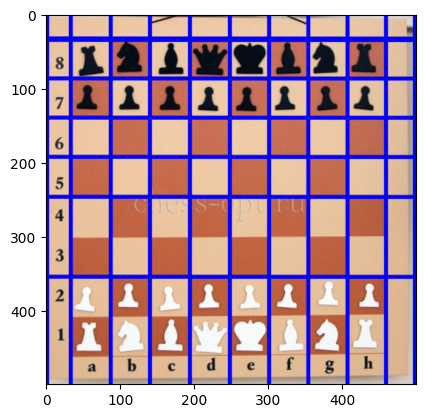

In [28]:
plt.imshow(image)

In [149]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

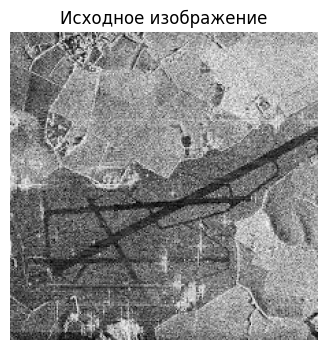

In [29]:
img_gray = cv2.imread('sar_3.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(4,4))
plt.imshow(img_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

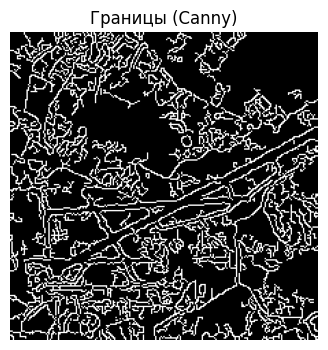

In [30]:
blur = cv2.GaussianBlur(img_gray, (5, 5), 1)
edges = cv2.Canny(blur, 50, 150, apertureSize=3)
plt.figure(figsize=(4,4))
plt.imshow(edges, cmap='gray')
plt.title('Границы (Canny)')
plt.axis('off')
plt.show()

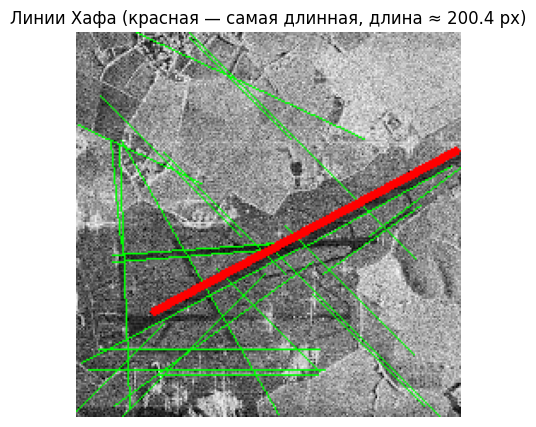

In [31]:

lines = cv2.HoughLinesP(
    edges,
    rho=1,
    theta=np.pi / 180,
    threshold=80,     
    minLineLength=50,  
    maxLineGap=10      
)
[
img_color = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

max_len = 0
longest_line = None

if lines is not None:
    for l in lines:
        x1, y1, x2, y2 = l[0]
        length = np.hypot(x2 - x1, y2 - y1)
        
        cv2.line(img_color, (x1, y1), (x2, y2), (0, 255, 0), 1)
        
        if length > max_len:
            max_len = length
            longest_line = (x1, y1, x2, y2)


if longest_line is not None:
    x1, y1, x2, y2 = longest_line
    cv2.line(img_color, (x1, y1), (x2, y2), (0, 0, 255), 3)

img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(img_rgb)
plt.title(f'Линии Хафа (красная — самая длинная, длина ≈ {max_len:.1f} px)')
plt.axis('off')
plt.show()


In [ ]:
#Точечная бинаризация

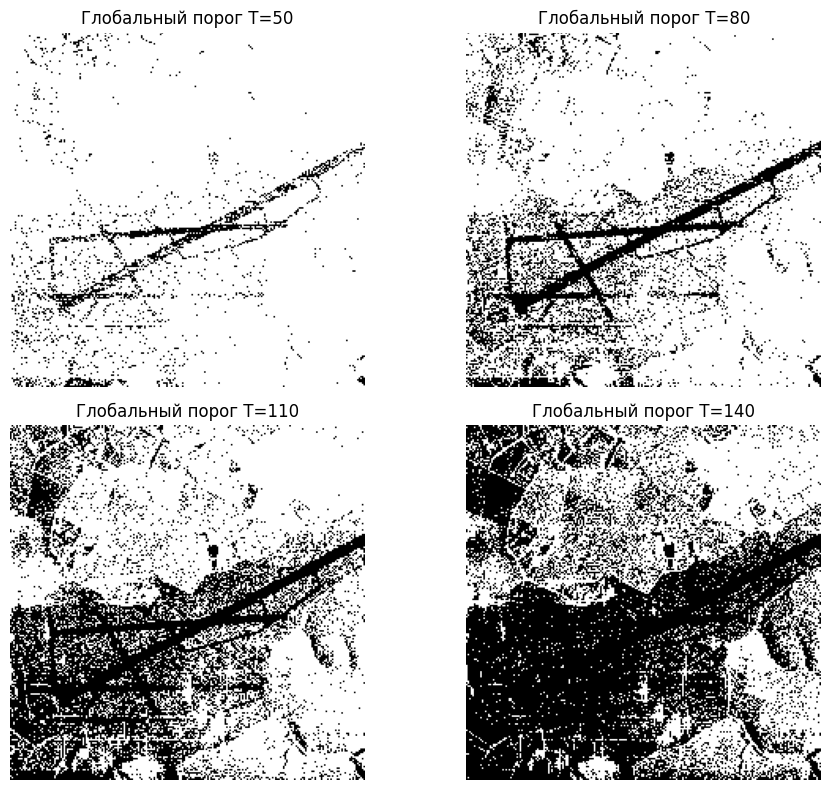

In [38]:
thresholds = [50, 80, 110, 140]
bin_imgs = []

for t in thresholds:
    _, b = cv2.threshold(img_gray, t, 255, cv2.THRESH_BINARY)
    bin_imgs.append(b)

plt.figure(figsize=(10,8))
for i, (t, b) in enumerate(zip(thresholds, bin_imgs), 1):
    plt.subplot(2, 2, i)
    plt.imshow(b, cmap='gray')
    plt.title(f'Глобальный порог T={t}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#Отсу

Порог по Отсу: 129.0


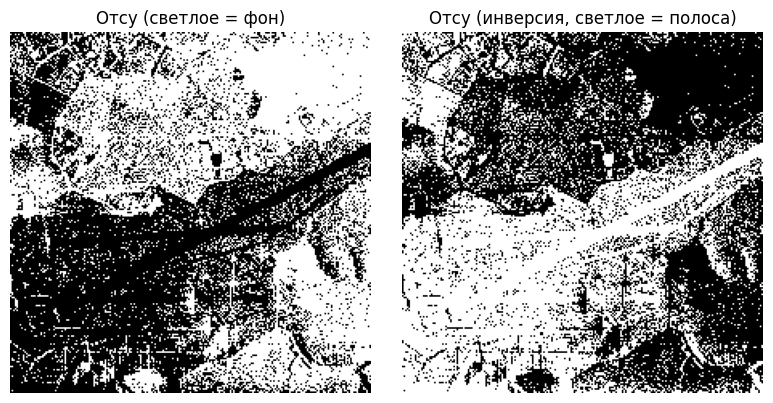

In [33]:
T_otsu, otsu_bin = cv2.threshold(img_gray, 0, 255,
                                 cv2.THRESH_BINARY + cv2.THRESH_OTSU)
T_otsu_inv, otsu_bin_inv = cv2.threshold(img_gray, 0, 255,
                                         cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

print('Порог по Отсу:', T_otsu)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(otsu_bin, cmap='gray')
plt.title('Отсу (светлое = фон)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(otsu_bin_inv, cmap='gray')
plt.title('Отсу (инверсия, светлое = полоса)')
plt.axis('off')

plt.tight_layout()
plt.show()


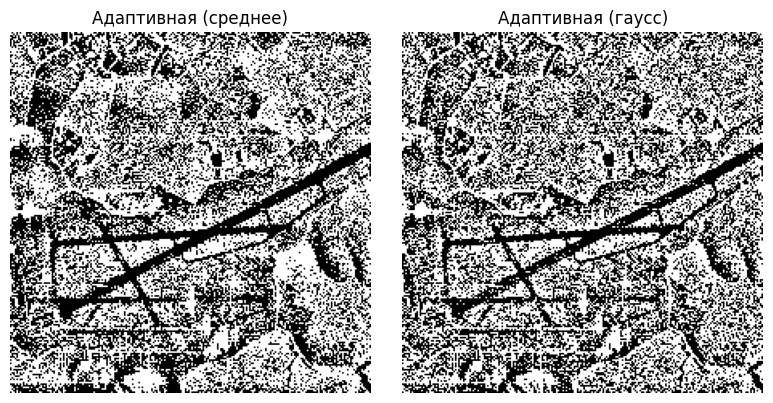

In [34]:

adapt_mean = cv2.adaptiveThreshold(
    img_gray, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    blockSize=35,  
    C=5            
)

adapt_gauss = cv2.adaptiveThreshold(
    img_gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    blockSize=35,
    C=5
)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(adapt_mean, cmap='gray')
plt.title('Адаптивная (среднее)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(adapt_gauss, cmap='gray')
plt.title('Адаптивная (гаусс)')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Адаптивная бинаризация

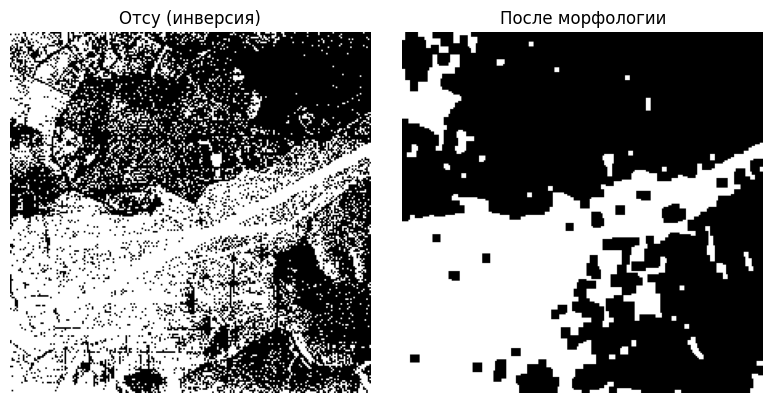

In [35]:

_, bin_inv = cv2.threshold(img_gray, 0, 255,
                           cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3,3), np.uint8)
bin_clean = cv2.morphologyEx(bin_inv, cv2.MORPH_OPEN, kernel, iterations=1)
bin_clean = cv2.morphologyEx(bin_clean, cv2.MORPH_CLOSE, kernel, iterations=2)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(bin_inv, cmap='gray')
plt.title('Отсу (инверсия)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(bin_clean, cmap='gray')
plt.title('После морфологии')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Маска полосы для последущего выделения

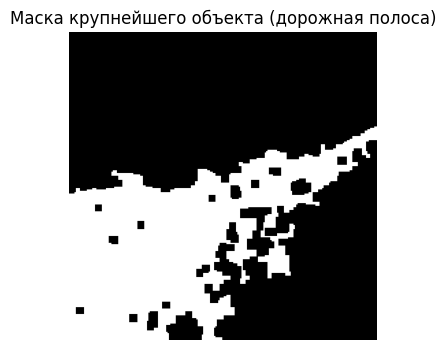

In [36]:

binary = (bin_clean > 0).astype('uint8')


num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)


areas = stats[1:, cv2.CC_STAT_AREA]
largest_label = 1 + np.argmax(areas)

mask_runway = (labels == largest_label).astype('uint8') * 255

plt.figure(figsize=(4,4))
plt.imshow(mask_runway, cmap='gray')
plt.title('Маска крупнейшего объекта (дорожная полоса)')
plt.axis('off')
plt.show()


In [ ]:
#накладываем на изображение

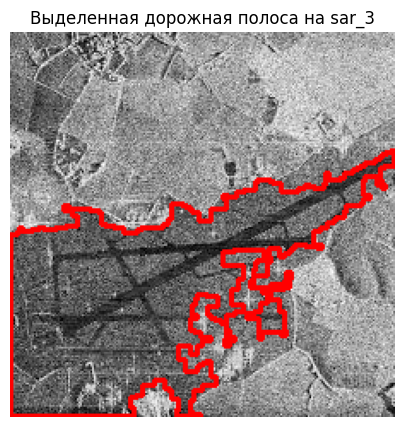

In [37]:
img_color = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

contours, _ = cv2.findContours(mask_runway, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img_color, contours, -1, (0,0,255), 2)

img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(img_rgb)
plt.title('Выделенная дорожная полоса на sar_3')
plt.axis('off')
plt.show()